In [2]:
%load_ext autotimebar

Label(value='0s')

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np

%matplotlib inline

plt.style.use('seaborn-v0_8-dark-palette')

with open("ResultsJsons/results_22_06_2024__20_01_03.json", "r") as f:
    results = json.load(f)

maps = results["maps"]
possible_number_of_tasks = results["tasks_num"]
possible_number_of_task_freq = results["tasks_frequency"]
possible_number_of_agents = results["agents_num"]
possible_number_of_starts = results["start_num"]
possible_number_of_goals = results["goal_num"]

Label(value='0s')

In [4]:
def stats_of(map_dict=None, run_id=None, maps=None):
    if run_id is not None and maps is not None:
        map_dict = [map for map in maps if map["run_id"] == run_id][0]

    fixed = map_dict["fixed"]
    learning = map_dict["learning"]

    time = {
        "fixed": np.arange(0, len(fixed["costs"]), 1),
        "learning": np.arange(0, len(learning["costs"]), 1)
    }
    
    df_time_fixed = pd.DataFrame({
        "costs": fixed["costs"], "serv_times": fixed["serv_times"], "pickup_to_goal_times": fixed["pickup_to_goal_times"],
        "start_to_pickup_times": fixed["start_to_pickup_times"], "runtimes": fixed["runtimes"], "time": time["fixed"]
    }, index=time["fixed"])
    
    df_time_learning = pd.DataFrame({
        "costs": learning["costs"], "serv_times": learning["serv_times"], "pickup_to_goal_times": learning["pickup_to_goal_times"],
        "start_to_pickup_times": learning["start_to_pickup_times"], "runtimes": learning["runtimes"], "time": time["learning"]
    }, index=time["learning"])
    
    df_tasks_fixed = pd.DataFrame({
        "estimated": fixed["estimated_costs"], "real": fixed["real_costs"]
    })
    
    df_tasks_learning = pd.DataFrame({
        "estimated": learning["estimated_costs"], "real": learning["real_costs"]
    })
    
    assert fixed['agents'] == learning['agents'] and fixed['tasks'] == learning['tasks'] and fixed['map_name'] == learning[
        "map_name"] and fixed['task_frequency'] == learning['task_frequency'] and fixed['pickup'] == learning['pickup'] and \
           fixed['goal'] == learning['goal']
    
    config = {
        "agents": fixed["agents"], "tasks": fixed["tasks"], "map": fixed["map_name"],
        "pickup": fixed["pickup"], "goal": fixed["goal"], "task_freq": fixed["task_frequency"]
    }
    
    return config, df_time_fixed, df_time_learning, df_tasks_fixed, df_tasks_learning

Label(value='0s')

In [5]:
def get_run_ids_from_map(map_name, maps):
    run_ids = []
    for map in maps:
        config = stats_of(map)[0]
        if config["map"] == map_name:
            run_ids.append(map["run_id"])
    return run_ids

Label(value='0s')

In [43]:
def show_costs(map_name, maps, variable_param):
    run_ids = get_run_ids_from_map(map_name, maps)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 6))

    # set width of bar 
    barWidth = 0.25
    possible_variable_num = []
    fixed_costs = []
    learning_costs = []
    
    for run_id in run_ids:
        config, df_fixed, df_learning, df_fixed_costs, df_learning_costs = stats_of(run_id=run_id, maps=maps)
        cost = df_fixed["costs"].apply(lambda x: x / config["tasks"]).iloc[-1]
        fixed_costs.append(cost)
        cost_learning = df_learning["costs"].apply(lambda x: x / config["tasks"]).iloc[-1]
        learning_costs.append(cost_learning)
        if config[variable_param] not in possible_variable_num:
            possible_variable_num.append(config[variable_param])
    
    config = stats_of(run_id=run_ids[0], maps=maps)[0]
    
    bar0 = np.arange(len(fixed_costs))
    bar1 = [x + barWidth for x in bar0]
    
    # Make the plot
    ax.bar(bar0, fixed_costs, color ='r', width = barWidth, 
            edgecolor ='grey', label ='Fixed') 
    ax.bar(bar1, learning_costs, color ='g', width = barWidth, 
            edgecolor ='grey', label ='Learning') 
    
    for bars in ax.containers:
        ax.bar_label(bars)
        
    parameter_string = ""
    for param in config:
        if param != variable_param and param != "map":
            parameter_string += f"{param}: {config[param]} "
    parameter_string += '\n'
    variable_string = f"Possible values of {variable_param}: {possible_variable_num}"

    plt.xlabel(f"Mappa: {config["map"]}\n" + parameter_string+variable_string, fontweight ='bold', fontsize = 8) 
    plt.ylabel('Costs per task', fontweight ='bold', fontsize = 8) 
    plt.xticks([r+barWidth/2 for r in range(len(possible_variable_num))], 
            possible_variable_num)
    plt.legend()
    plt.show()

Label(value='0s')

In [44]:
def get_variable_config_parameter(**kwargs):
    for param in kwargs:
        if len(kwargs[param]) > 1:
            return param

Label(value='0s')

Label(value='0s')

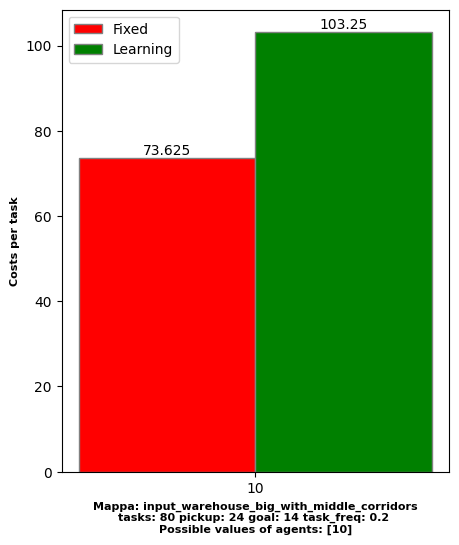

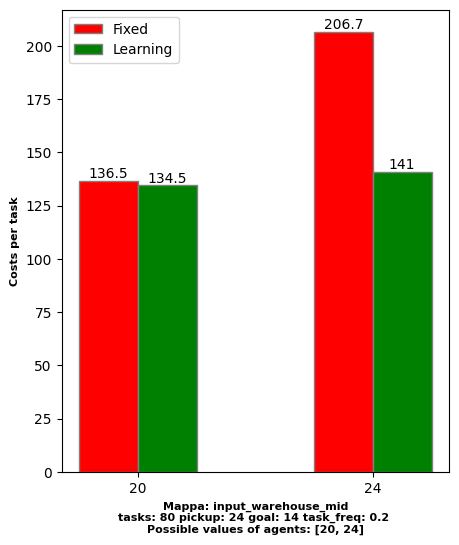

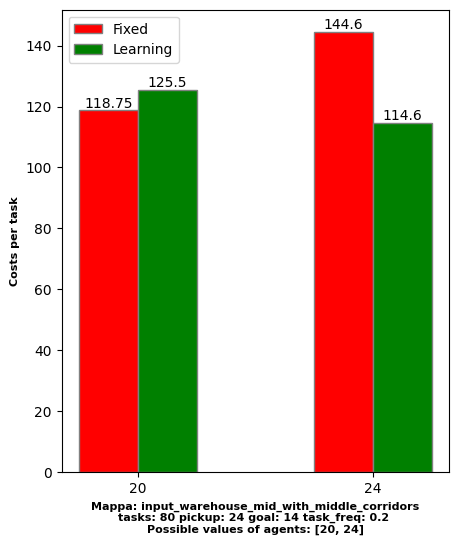

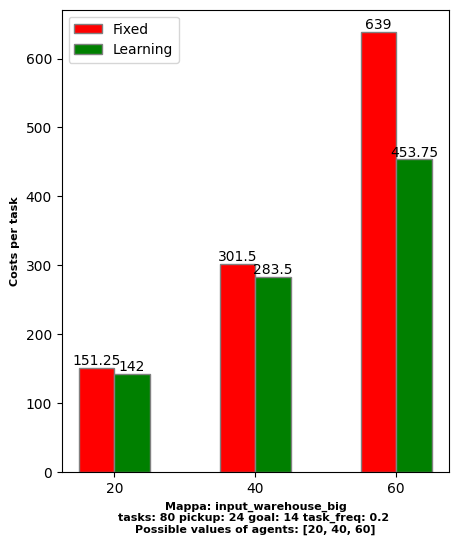

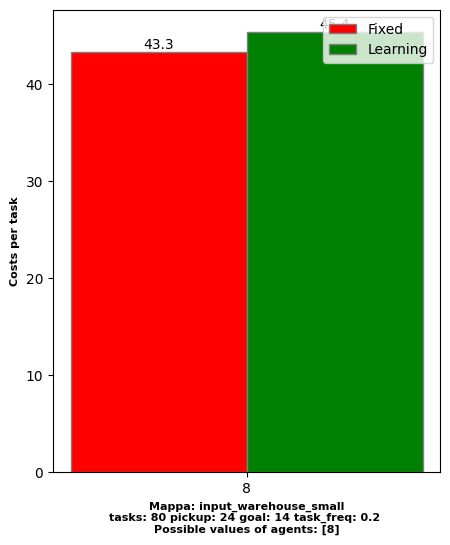

In [45]:
map_names = set()
for map in maps:
    config = stats_of(map)[0]
    map_names.add(config["map"])

variable_param = get_variable_config_parameter(agents=possible_number_of_agents, tasks=possible_number_of_tasks, task_freq=possible_number_of_task_freq, starts=possible_number_of_starts, goals=possible_number_of_goals)

for my_map in map_names:
    show_costs(my_map, maps, variable_param)